In [1]:
!pip install binance_historical_data mplfinance darts stable-baselines3


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from binance_historical_data import BinanceDataDumper

data_dumper = BinanceDataDumper(
    path_dir_where_to_dump=".",
    asset_class="spot",  # spot, um, cm
    data_type="klines",  # aggTrades, klines, trades
    data_frequency="1m",
)

print(data_dumper.get_list_all_trading_pairs())

data_dumper.dump_data(tickers=["NEARUSDT"])

['ETHBTC', 'LTCBTC', 'BNBBTC', 'NEOBTC', 'QTUMETH', 'EOSETH', 'SNTETH', 'BNTETH', 'BCCBTC', 'GASBTC', 'BNBETH', 'BTCUSDT', 'ETHUSDT', 'HSRBTC', 'OAXETH', 'DNTETH', 'MCOETH', 'ICNETH', 'MCOBTC', 'WTCBTC', 'WTCETH', 'LRCBTC', 'LRCETH', 'QTUMBTC', 'YOYOBTC', 'OMGBTC', 'OMGETH', 'ZRXBTC', 'ZRXETH', 'STRATBTC', 'STRATETH', 'SNGLSBTC', 'SNGLSETH', 'BQXBTC', 'BQXETH', 'KNCBTC', 'KNCETH', 'FUNBTC', 'FUNETH', 'SNMBTC', 'SNMETH', 'NEOETH', 'IOTABTC', 'IOTAETH', 'LINKBTC', 'LINKETH', 'XVGBTC', 'XVGETH', 'SALTBTC', 'SALTETH', 'MDABTC', 'MDAETH', 'MTLBTC', 'MTLETH', 'SUBBTC', 'SUBETH', 'EOSBTC', 'SNTBTC', 'ETCETH', 'ETCBTC', 'MTHBTC', 'MTHETH', 'ENGBTC', 'ENGETH', 'DNTBTC', 'ZECBTC', 'ZECETH', 'BNTBTC', 'ASTBTC', 'ASTETH', 'DASHBTC', 'DASHETH', 'OAXBTC', 'ICNBTC', 'BTGBTC', 'BTGETH', 'EVXBTC', 'EVXETH', 'REQBTC', 'REQETH', 'VIBBTC', 'VIBETH', 'HSRETH', 'TRXBTC', 'TRXETH', 'POWRBTC', 'POWRETH', 'ARKBTC', 'ARKETH', 'YOYOETH', 'XRPBTC', 'XRPETH', 'MODBTC', 'MODETH', 'ENJBTC', 'ENJETH', 'STORJBTC', 'ST

Tickers:   0%|          | 0/1 [00:00<?, ?it/s]

monthly files to download:   0%|          | 0/1 [00:00<?, ?files/s]

daily files to download:   0%|          | 0/1 [00:00<?, ?files/s]

Tried to dump data for 1 tickers:
---> For NEARUSDT new data saved for: 0 months 1 days


In [3]:
import pandas as pd
import numpy as np
import os

filenames = next(os.walk("./spot/monthly/klines/NEARUSDT/1m"), (None, None, []))[2]  # [] if no file

columns = [
    "Open time",
    "Open",
    "High",
    "Low",
    "Close",
    "Volume",
    "Close time",
    "Quote asset volume",
    "Number of trades",
    "Taker buy base asset volume",
    "Taker buy quote asset volume",
    "Ignore"
]

df = pd.DataFrame(columns=columns)

for f in filenames:
    new_df = pd.read_csv(f"./spot/monthly/klines/NEARUSDT/1m/{f}", header=None, names=columns)
    df = pd.concat([df, new_df])
df = df.sort_values(by="Open time")
df

/tmp/ipykernel_3976353/777231159.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_df])


,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1602651600000,1.3000,1.8800,1.3000,1.3760,1429560.44,1602651659999,2.313165e+06,1848,520043.50,837306.088337,0
1,1602651660000,1.3759,1.4000,1.1111,1.2493,987505.68,1602651719999,1.205528e+06,1392,614158.78,747451.518743,0
2,1602651720000,1.2489,1.3593,1.1660,1.2552,549711.33,1602651779999,6.942747e+05,1103,277203.12,349648.438905,0
3,1602651780000,1.2499,1.2500,1.1359,1.1742,343258.80,1602651839999,4.081314e+05,773,170461.39,202748.271257,0
4,1602651840000,1.1754,1.2752,1.1753,1.2300,243382.88,1602651899999,2.965310e+05,440,170472.03,207510.362489,0
...,...,...,...,...,...,...,...,...,...,...,...,...
44635,1690847700000,1.3710,1.3710,1.3690,1.3690,5932.20,1690847759999,8.131457e+03,23,0.00,0.000000,0
44636,1690847760000,1.3690,1.3690,1.3690,1.3690,81.30,1690847819999,1.112997e+02,3,81.30,111.299700,0
44637,1690847820000,1.3690,1.3700,1.3690,1.3690,1278.00,1690847879999,1.749664e+03,10,438.10,599.840400,0
44638,1690847880000,1.3690,1.3700,1.3690,1.3700,468.60,1690847939999,6.415331e+02,6,468.60,641.533100,0


In [4]:
OHLC_COLUMNS = [
    "Open",
    "High",
    "Low",
    "Close"]
dataset = df.loc[:, OHLC_COLUMNS].astype(np.float64)
dataset = pd.DataFrame(dataset.to_numpy(), columns=OHLC_COLUMNS)


def add_features(df):
    df = df.copy()
    # add technical indicators to dataset
    df['SMA_256'] = df['Close'].rolling(window=256).mean()
    df['SMA_512'] = df['Close'].rolling(window=512).mean()
    df['SMA_1024'] = df['Close'].rolling(window=1024).mean()

    # convert SMA columns to distance in percentages from "Close"
    df['SMA_256'] = ((df['Close'] - df['SMA_256']) / df['SMA_256'])
    df['SMA_512'] = ((df['Close'] - df['SMA_512']) / df['SMA_512'])
    df['SMA_1024'] = ((df['Close'] - df['SMA_1024']) / df['SMA_1024'])

    # drop NaN rows resulting from the SMA calculations
    df = df.dropna()
    return df


dataset = add_features(dataset)
dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1023,1.1284,1.1293,1.1284,1.1293,0.027575,-0.002864,-0.033380
1024,1.1284,1.1309,1.1284,1.1309,0.029032,-0.001275,-0.031812
1025,1.1310,1.1361,1.1310,1.1361,0.033741,0.003445,-0.027268
1026,1.1362,1.1364,1.1337,1.1364,0.033990,0.003865,-0.026914
1027,1.1375,1.1382,1.1356,1.1376,0.035056,0.005082,-0.025857
...,...,...,...,...,...,...,...
1468511,1.3710,1.3710,1.3690,1.3690,0.002847,-0.001843,-0.010031
1468512,1.3690,1.3690,1.3690,1.3690,0.002859,-0.001824,-0.010010
1468513,1.3690,1.3700,1.3690,1.3690,0.002873,-0.001804,-0.009989
1468514,1.3690,1.3700,1.3690,1.3700,0.003617,-0.001057,-0.009247


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


class MultiScaler:
    def __init__(self, min_max: MinMaxScaler, std: StandardScaler):
        self.min_max = min_max
        self.std = std


def preprocess(df, scaler=None):
    # Apply percentage change only to OHLC columns
    df_pct = df[OHLC_COLUMNS].pct_change()

    # clamp
    df_pct[df_pct > 0.1] = 0.1
    df_pct[df_pct < -0.1] = -0.1

    # Concatenate the percentage-changed OHLC with the other columns
    df_all = pd.concat([df_pct, df.drop(columns=OHLC_COLUMNS)], axis=1)

    # Drop NA values (from pct_change operation)
    df_all = df_all.dropna()

    # Apply MinMax scaling to all columns
    if scaler is None:
        scaler = MultiScaler(MinMaxScaler(feature_range=(-1, 1)), StandardScaler())
        df_multi_scaled = scaler.min_max.fit_transform(scaler.std.fit_transform(df_all))
    else:
        df_multi_scaled = scaler.min_max.transform(scaler.std.transform(df_all))

    df_scaled = pd.DataFrame(df_multi_scaled,
                             columns=df_all.columns,
                             index=df_all.index)

    return df_scaled, scaler


def invert_preprocess(original_start, scaler: MultiScaler, df):
    original_start = original_start[OHLC_COLUMNS].to_numpy()
    # Invert MinMax scaling for all columns
    df_inv_scaled = pd.DataFrame(scaler.std.inverse_transform(scaler.min_max.inverse_transform(df)),
                                 columns=df.columns,
                                 index=df.index)

    # Recover the original OHLC values
    reversed_array = np.cumprod(1 + df_inv_scaled[OHLC_COLUMNS].to_numpy(), axis=0)
    reversed_array = reversed_array * original_start  # Scaling by the original_start to each element

    df_inv_scaled[OHLC_COLUMNS] = reversed_array

    return df_inv_scaled


preprocessed_dataset, scaler = preprocess(dataset)

# transform dataset so that all transform-invert transform pairs are idempotent
dataset = invert_preprocess(dataset.iloc[0], scaler, preprocessed_dataset)
dataset = add_features(dataset)

preprocessed_dataset

,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
1024,1.243783e-16,1.416807e-02,2.991144e-16,-0.003740,-0.246520,-0.283731,-0.298767
1025,2.304147e-02,4.598108e-02,2.304147e-02,0.028651,-0.238204,-0.275479,-0.291010
1026,4.597701e-02,2.640613e-03,2.387268e-02,-0.015477,-0.237763,-0.274744,-0.290407
1027,1.144165e-02,1.583949e-02,1.675928e-02,-0.007414,-0.235881,-0.272617,-0.288602
1028,7.032967e-03,5.798629e-02,7.044734e-03,0.046276,-0.224408,-0.261230,-0.277957
...,...,...,...,...,...,...,...
1468511,1.243783e-16,8.124401e-17,-1.458789e-02,-0.033018,-0.292761,-0.284723,-0.261584
1468512,-1.458789e-02,-1.458789e-02,2.991144e-16,-0.018165,-0.292740,-0.284690,-0.261547
1468513,1.243783e-16,7.304602e-03,2.991144e-16,-0.018165,-0.292715,-0.284656,-0.261513
1468514,1.243783e-16,8.124401e-17,2.991144e-16,-0.010728,-0.291401,-0.283349,-0.260245


In [6]:
from sklearn.metrics import mean_absolute_error


def test_preprocess_invert_preprocess(original_df):
    original_df = original_df
    preprocessed_df, scaler = preprocess(original_df)

    # Assume that 'original_start' is the first row of the original DataFrame
    original_start = original_df.iloc[0]

    inverted_df = invert_preprocess(original_start, scaler, preprocessed_df)

    mae_list = []
    for col in original_df.columns:
        # Start from the second row of the original_df for comparison
        mae = mean_absolute_error(original_df.iloc[1:][col], inverted_df[col])
        mae_list.append(mae)
        print(f"Mean Absolute Error for {col}: {mae}")

    avg_mae = sum(mae_list) / len(mae_list)
    print(f"Average MAE: {avg_mae}")

    return avg_mae < 1e-9


# Assuming 'dataset' is your original DataFrame
assert test_preprocess_invert_preprocess(dataset)


def test_orig_val():
    # The original_start passed to invert_preprocess() must be the first value in the corresponding
    # original DataFrame segment. For the first range, that's range_orig.iloc[0].
    # For the second range, it's range_orig.iloc[500].

    range_orig = dataset.iloc[1000:2000]
    range_preproc, s = preprocess(range_orig)

    # Inverted for the whole preprocessed range
    range1_inv = invert_preprocess(range_orig.iloc[0], s, range_preproc)

    # Inverted for the latter part of the preprocessed range
    range2_inv = invert_preprocess(range_orig.iloc[500], s, range_preproc.iloc[500:])

    # Due to floating point errors, equality may not be exact. So you might use pd.testing.assert_frame_equal
    # with the check_exact=False parameter
    pd.testing.assert_frame_equal(range1_inv.iloc[500:].reset_index(drop=True),
                                  range2_inv.reset_index(drop=True), check_exact=False)


test_orig_val()

Mean Absolute Error for Open: 3.542045167986639e-13
Mean Absolute Error for High: 8.662094479112055e-13
Mean Absolute Error for Low: 8.57909140967899e-13
Mean Absolute Error for Close: 5.397569701383252e-13
Mean Absolute Error for SMA_256: 8.735925372994355e-19
Mean Absolute Error for SMA_512: 1.3244273082872025e-18
Mean Absolute Error for SMA_1024: 1.802668530215252e-18
Average MAE: 3.7401201092920986e-13


<Axes: xlabel='time'>

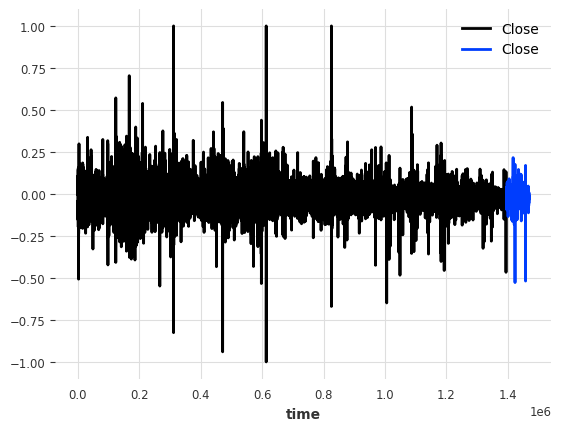

In [7]:
import numpy as np
import pandas as pd

from darts import TimeSeries

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

target_series = TimeSeries.from_dataframe(preprocessed_dataset)
target_train, target_val = target_series.split_after(0.95)

target_train["Close"].plot()
target_val["Close"].plot()

In [8]:

from darts.utils.likelihood_models import QuantileRegression
from darts.models import TFTModel

SEQUENCE_LENGTH = 128
PREDICTION_LENGTH = 32
# my_model = RNNModel(
#     model="LSTM",
#     hidden_dim=64,
#     n_rnn_layers=4,
#     dropout=0.1,
#     batch_size=4096,
#     n_epochs=10,
#     # optimizer_kwargs={"lr": 1e-3},
#     # random_state=0,
#     training_length=SEQUENCE_LENGTH,
#     input_chunk_length=SEQUENCE_LENGTH,
#     # likelihood=GaussianLikelihood(),
# )

my_model = TFTModel(
    input_chunk_length=SEQUENCE_LENGTH,
    output_chunk_length=PREDICTION_LENGTH,
    hidden_size=128,
    lstm_layers=2,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=512,
    n_epochs=1,
    add_relative_index=True,
    add_encoders=None,
    random_state=42,
    categorical_embedding_sizes={},
    likelihood=QuantileRegression(),
)

TFTMODEL_PATH = "model-weights-1694211368.0068371.pt"
my_model.load_weights(TFTMODEL_PATH)
# my_model = RNNModel.load("model-weights-1694033110.215867.pt")

# my_model.fit(target_train, val_series=target_val, verbose=True)

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')
# 
# import time
# import os
# try:
#   os.makedirs("./drive/MyDrive/colab/model-weights/")
# except:
#   pass
# my_model.save(f"./drive/MyDrive/colab/model-weights/model-weights-{time.time()}.pt")

In [10]:
from darts.metrics import mse


def backtest(testing_model, series):
    # Compute the backtest predictions with the two models
    pred_err = testing_model.backtest(
        series=series,
        forecast_horizon=PREDICTION_LENGTH,
        stride=10,
        retrain=False,
        verbose=False,
        metric=mse
    )
    print("MSE:", pred_err)


backtest(my_model, target_val)

MSE: 0.00019555979220087254


Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='time'>

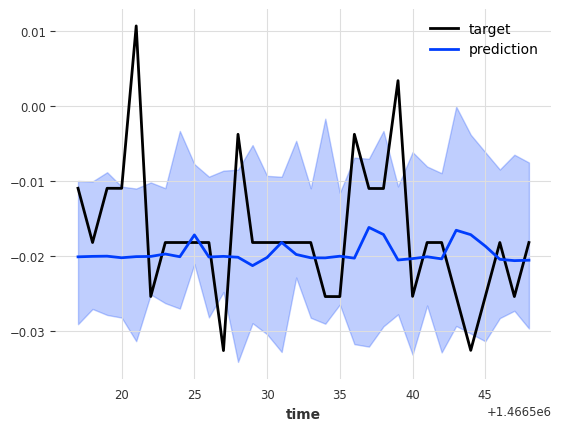

In [11]:
OFFSET_BACK = 1999
predict_X = target_series[-SEQUENCE_LENGTH - OFFSET_BACK:-OFFSET_BACK]
assert len(predict_X) == SEQUENCE_LENGTH
pred: TimeSeries = my_model.predict(PREDICTION_LENGTH, predict_X, num_samples=32)

target_val["Close"].slice_intersect(pred["Close"]).plot(label="target")
pred["Close"].plot(label="prediction")

In [12]:
original_start_pred = dataset.loc[predict_X[-1].time_index.start]
inverted_pred = invert_preprocess(original_start_pred, scaler, pred.mean().pd_dataframe())
inverted_pred

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1466517,0.841273,0.795115,0.998349,0.833300,-0.004042,0.000183,-0.001737
1466518,0.841351,0.795172,0.998334,0.833223,-0.004235,0.000060,-0.000580
1466519,0.841392,0.795178,0.998338,0.833216,-0.003698,0.000090,-0.000890
1466520,0.841458,0.795131,0.998297,0.833055,-0.004166,0.000408,-0.001903
1466521,0.841316,0.795297,0.998353,0.832860,-0.003819,0.000483,-0.000909
1466522,0.841290,0.795348,0.998375,0.832864,-0.003632,0.000084,-0.001190
1466523,0.841309,0.795487,0.998364,0.832843,-0.004210,-0.000349,0.000071
1466524,0.841213,0.795614,0.998311,0.832897,-0.003714,-0.000257,-0.001941
1466525,0.841245,0.795684,0.998390,0.833035,-0.003345,-0.001009,-0.000474


In [13]:
PLOT_BEFORE_PREDICTION = int(PREDICTION_LENGTH / 2)
start_idx = predict_X[-1].time_index.start
original_start_tg = dataset.loc[start_idx - PLOT_BEFORE_PREDICTION]
index = target_series.time_index.intersection(pred.time_index)
index = index.union(index - PLOT_BEFORE_PREDICTION)
inverted_target = invert_preprocess(original_start_tg, scaler, target_series[index].pd_dataframe())
inverted_target

component,Open,High,Low,Close,SMA_256,SMA_512,SMA_1024
time,,,,,,,
1466501,0.842515,0.796136,0.999064,0.834644,-0.002590,0.001542,0.001309
1466502,0.842515,0.796136,0.999774,0.834644,-0.002573,0.001539,0.001308
1466503,0.841917,0.795571,0.998354,0.833458,-0.003957,0.000115,-0.000115
1466504,0.841318,0.795005,0.998354,0.833458,-0.003927,0.000115,-0.000116
1466505,0.840720,0.795005,0.997644,0.833458,-0.003910,0.000115,-0.000117
1466506,0.840720,0.795005,0.996933,0.832865,-0.004594,-0.000595,-0.000828
1466507,0.840122,0.793874,0.996933,0.832273,-0.005272,-0.001303,-0.001538
1466508,0.840122,0.795005,0.996933,0.832865,-0.004544,-0.000590,-0.000826
1466509,0.840720,0.794440,0.996223,0.831680,-0.005934,-0.002009,-0.002247


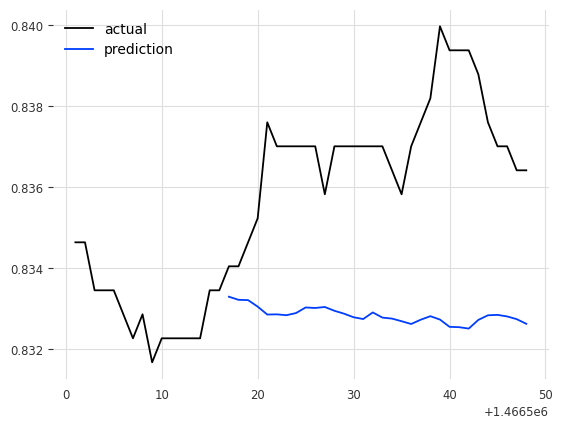

In [14]:

import matplotlib.pyplot as plt

# Create a DataFrame from the 'candlesticks' array
candlesticks_df = pd.DataFrame(inverted_target, columns=OHLC_COLUMNS)
candlesticks_pred_df = pd.DataFrame(inverted_pred, columns=OHLC_COLUMNS)

plt.plot(candlesticks_df["Close"], label="actual")
plt.plot(candlesticks_pred_df["Close"], label="prediction")
plt.legend()

# Adding a fake date index (mplfinance needs this)
# candlesticks_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_df.shape[0])
# candlesticks_df['Date'] = candlesticks_df['Date'].apply(mdates.date2num)
# candlesticks_pred_df['Date'] = pd.date_range(start='1/1/2000', periods=candlesticks_pred_df.shape[0])
# candlesticks_pred_df['Date'] = candlesticks_pred_df['Date'].apply(mdates.date2num)
# 
# # Reordering columns to fit mplfinance requirements
# candlesticks_df = candlesticks_df[['Date', 'Open', 'High', 'Low', 'Close']]
# candlesticks_pred_df = candlesticks_pred_df[['Date', 'Open', 'High', 'Low', 'Close']]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 10))
# 
# candlestick_ohlc(ax, candlesticks_pred_df.values, width=0.6, colorup='lime', colordown='magenta', alpha=0.5)
# candlestick_ohlc(ax, candlesticks_df.values, width=0.6, colorup='g', colordown='r', alpha=0.5)

plt.show()

In [15]:
%load_ext tensorboard
%tensorboard --logdir tensorboard

Launching TensorBoard...

In [31]:
import time
from stable_baselines3 import PPO
import random
import gymnasium as gym
from gymnasium import spaces


def calculate_observation(df, model, scaler, buy_price):
    MODEL_INPUT_IN_OBSERVATION = 10

    df_with_features = add_features(df)

    original_start = df_with_features.iloc[-1]
    df_preprocessed, _ = preprocess(df_with_features, scaler)

    X = TimeSeries.from_dataframe(df_preprocessed[-SEQUENCE_LENGTH:])
    y = model.predict(PREDICTION_LENGTH, X, verbose=False, num_samples=8)

    y_mean = y.mean()

    y_inverted = invert_preprocess(original_start, scaler, y_mean.pd_dataframe())
    y_max_close = y_inverted.Close.mean()
    curr_close = original_start.Close

    y_std = y.std().pd_dataframe().Close.mean()
    predicted_gain = (y_max_close - curr_close) / curr_close
    current_gain = ((curr_close - buy_price) / buy_price) if buy_price is not None else 0
    last_32 = df_preprocessed.Close.iloc[-MODEL_INPUT_IN_OBSERVATION:].to_numpy().flatten()
    model_output = y_mean[:MODEL_INPUT_IN_OBSERVATION].pd_dataframe().Close.to_numpy().flatten()
    buy_status = 1 if buy_price is not None else 0
    observation = np.concatenate(
        [last_32, model_output, [predicted_gain], [buy_status], [y_std], [current_gain]]).astype(np.float32)

    return observation, curr_close


class CustomEnv(gym.Env):
    SKIP_STEPS = 1200

    def __init__(self, dataset: pd.DataFrame, my_model: TFTModel, scaler: MultiScaler, episode_length=512,
                 commission=0.001, random_seed_set=False):
        super().__init__()

        self.random_seed_set = random_seed_set
        self.commission = commission

        # 0: hold; 1: buy; 2: sell
        self.action_space = spaces.Discrete(3)

        self.NUM_FEATURES = calculate_observation(dataset, my_model, scaler, False)[0].shape[0]
        print(f"obs length = {self.NUM_FEATURES}")

        # Update the observation space to include extra information
        self.observation_space = spaces.Box(low=-1, high=1,
                                            shape=(self.NUM_FEATURES,),
                                            dtype=np.float32)

        self.dataset = dataset
        self.my_model = my_model
        self.scaler = scaler
        self.episode_length = episode_length
        self.current_step = 0
        self.start_index = 0
        self.buy_price = None

    def step(self, action):
        self.current_step += 1

        # Calculate the current observation
        observation, curr_close = self.calculate_observation(self.current_step)

        # Initialize reward and info
        reward = 0

        # Give small rewards or penalties for holding
        if self.buy_price is not None:
            if curr_close > self.buy_price:
                reward += 0.01  # small reward for holding when price increases
            elif curr_close < self.buy_price:
                reward -= 0.01  # small penalty for holding when price decreases

        # Action logic
        if self.buy_price is None:
            if action == 1:  # Buy
                self.buy_price = curr_close
                reward -= 0.02
        else:
            sell_fee = curr_close * (1 - self.commission)
            buy_fee = self.buy_price * (1 + self.commission)
            gain_from_trade_fee = (sell_fee - buy_fee) / buy_fee
            if action == 2:  # Sell
                self.buy_price = None
                # Large reward for a profitable sell
                reward += gain_from_trade_fee * 100
                # print(f"gain {gain_from_trade_fee}")

        info = {}
        terminated = self.current_step >= self.episode_length
        return observation, reward, terminated, False, info

    def reset(self, seed=None, options=None):
        self.current_step = 0
        self.buy_price = None
        self.start_index = random.randint(self.SKIP_STEPS, len(self.dataset) - self.episode_length - 1)
        observation, _ = self.calculate_observation(self.current_step)
        info = {}
        return observation, info

    def render(self):
        pass

    def close(self):
        pass

    def calculate_observation(self, current_step):
        index_start = self.start_index + current_step - self.SKIP_STEPS
        index_end = self.start_index + current_step

        df = self.dataset.iloc[index_start:index_end].copy()
        observation, curr_close = calculate_observation(df, self.my_model, self.scaler, self.buy_price)

        return observation, curr_close


from stable_baselines3.common.env_checker import check_env

env = CustomEnv(dataset, my_model, scaler)
check_env(env)

# {'gamma': 0.8, 'ent_coef': 0.02, 'gae_lambda': 0.92}
rl_model = PPO("MlpPolicy", env,
               verbose=1,
               tensorboard_log="./tensorboard/",
               ent_coef=0.02,
               gae_lambda=0.92,
               gamma=0.8)
rl_model.set_parameters("rl_model-best_model.zip")

obs length = 24


KeyboardInterrupt: 

In [17]:
# # Define hyperparameter search space
# gammas = [0.8, 0.9, 0.95]
# ent_coefs = [0.005, 0.01, 0.02]
# gae_lambdas = [0.9, 0.92, 0.95]
# best_reward = float('-inf')
# best_params = None
# 
# 
# # Evaluation function placeholder. Implement this based on your specific needs.
# def evaluate_model(model, env, num_episodes=10):
#     total_rewards = 0
#     for _ in range(num_episodes):
#         obs, _ = env.reset()
#         terminated = False
#         truncated = False
#         episode_reward = 0
#         while not (terminated or truncated):
#             action, _states = model.predict(obs)
#             obs, reward, terminated, truncated, info = env.step(action)
#             episode_reward += reward
#         total_rewards += episode_reward
#     mean_reward = total_rewards / num_episodes
#     return mean_reward
# 
# 
# # Perform the search
# for gamma in gammas:
#     for ent_coef in ent_coefs:
#         for gae_lambda in gae_lambdas:
#             print(f"Training with gamma={gamma}, ent_coef={ent_coef}, gae_lambda={gae_lambda}")
# 
#             random.seed(42)
#             rl_model = PPO("MlpPolicy", env,
#                            verbose=1,
#                            ent_coef=ent_coef,
#                            gamma=gamma,
#                            gae_lambda=gae_lambda)
# 
#             # Learn and evaluate the model (simplified)
#             rl_model.learn(total_timesteps=5000)
#             mean_reward = evaluate_model(rl_model, env)  # You'll need to define this function
# 
#             print(f"Mean reward: {mean_reward}")
# 
#             if mean_reward > best_reward:
#                 best_reward = mean_reward
#                 best_params = {'gamma': gamma, 'ent_coef': ent_coef, 'gae_lambda': gae_lambda}
# 
# print(f"Best params: {best_params}, Best reward: {best_reward}")

In [18]:
from stable_baselines3.common.callbacks import CheckpointCallback, EvalCallback

checkpoint_callback = CheckpointCallback(
    save_freq=10_000,
    save_path="rl-model-checkpoints/",
    name_prefix="rl_model",
    verbose=1,
    save_vecnormalize=True,
    save_replay_buffer=True
)
eval_env = CustomEnv(dataset, my_model, scaler)
eval_callback = EvalCallback(eval_env, best_model_save_path="rl-model-best-model/best_model",
                             log_path="rl-model-best-model/results", eval_freq=10_000, verbose=1)

rl_model.learn(total_timesteps=100_000, callback=[checkpoint_callback, eval_callback])

obs length = 24
Logging to ./tensorboard/PPO_4
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 512      |
|    ep_rew_mean     | -3.01    |
| time/              |          |
|    fps             | 14       |
|    iterations      | 1        |
|    time_elapsed    | 143      |
|    total_timesteps | 2048     |
---------------------------------


TypeError: 'NoneType' object is not iterable

In [29]:
evaluations=np.load("rl-model-best-model/results/evaluations.npz")
evaluations_df = pd.DataFrame()
evaluations_df["timesteps"] = evaluations["timesteps"]
evaluations_df["results"] = evaluations["results"].mean(axis=1)
evaluations_df

,timesteps,results
0,10000,0.000000
1,20000,0.000000
2,30000,0.000000
3,40000,0.000000
4,50000,0.000000
5,60000,0.000000
6,70000,0.000000
7,80000,0.000000
8,90000,0.000000
9,100000,-1.027175


In [23]:
# backtesting

from backtesting import Backtest, Strategy


class NeuralNetStrat(Strategy):
    def __init__(self, broker, data, params):
        super().__init__(broker, data, params)
        self.buy_price = None
        self.expected_gain = None

    def init(self):
        pass

    def next(self):
        if len(self.data) > 1200:
            df = self.data.df.iloc[-1200:].copy()
            df.drop(columns=["Volume"], inplace=True)
            observation, curr_close = calculate_observation(df, my_model, scaler, self.buy_price)

            action, _ = rl_model.predict(observation, deterministic=True)
            if self.buy_price is None:
                if action == 1:
                    self.buy()
                    print(f"buy")
                    self.buy_price = curr_close
            else:
                if action == 2:
                    commission = 0.001
                    sell_fee = curr_close * (1 - commission)
                    buy_fee = self.buy_price * (1 + commission)
                    gain_from_trade_fee = (sell_fee - buy_fee) / buy_fee
                    print(f"gain {gain_from_trade_fee}")
                    self.sell()
                    self.buy_price = None


bt = Backtest(dataset[-10000:], NeuralNetStrat, commission=.001,
              exclusive_orders=True)
stats = bt.run()
stats

buy
gain 0.00393806936557775
buy
gain 0.00021813863412948394
buy
gain 0.0009481293614135319
buy
gain 0.00020833992831075142
buy
gain 0.0009437872370813392
buy
gain 0.0031425528114269537
buy
gain 0.0045774138014255585
buy
gain 0.005991824769116936
buy
gain 0.000168427809519303
buy
gain 0.002313021751469137
buy
gain 0.0030134857968437427
buy
gain 0.004408572882194815
buy
gain 0.0029566178502379078
buy


Start                               1458516.0
End                                 1468515.0
Duration                               9999.0
Exposure Time [%]                       87.99
Equity Final [$]                  9964.676796
Equity Peak [$]                  10406.053417
Return [%]                          -0.353232
Buy & Hold Return [%]               -0.072939
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                   -6.174796
Avg. Drawdown [%]                   -3.349979
Max. Drawdown Duration                 2271.0
Avg. Drawdown Duration                  879.9
# Trades                                 27.0
Win Rate [%]                        59.259259
Best Trade [%]                       0.627175
Worst Trade [%]                     -3.345242
Avg. Trade [%]                    